# WeatherPy
----

### Goal
Build several scatter plots to identify relationships between the following:
* Temperature vs Lattitude
* Humidity vs Latitude
* Cloudiness vs Latitude
* Wind Speed vs Lattitude

### Analysis

* There is a correlation between Latitude and Temperature in which the temperature increases the closer you get to the equator. It is likely that this will remain true if the sample of locations were different. 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
#Create an empty dataframe. This Data frame will be added into the loop to be filled by the API Calls
city_df = pd.DataFrame({"City": [],
                               "Cloudiness": [],
                               "Country": [],
                               "Date": [],
                               "Humidity": [],
                               "Lat": [],
                               "Lon": [],
                               "Max Temp": [],
                               "Wind Speed": []
                              })

In [4]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Perform weather check on each city using a series of successive API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print initial heading for print log
print("Beginning Data Retrieval")
print("-----------------------------")

#Establish initial values for set counter/ max call/ records
sets = 1
max_calls = 50
records = 1

# Loop through the list of cities and request the weather for each
for eachcity in cities:

    #Establish log report print / try & except / API Call
    try:
        #Api request for each city's weather
        response = requests.get(query_url + eachcity).json()
         


        # add data to data frame
        city_df = city_df.append({"City": response['name'], "Cloudiness": response['clouds']['all'],
                               "Country": response['sys']['country'] ,
                               "Date": response['dt'], "Humidity": response['main']['humidity'] ,              
                               "Lat": response['coord']['lat'] ,
                               "Lon": response['coord']['lon'],
                               "Max Temp": response['main']['temp_max'],
                               "Wind Speed": response['wind']['speed']}, ignore_index = True)

        #set up log report
        results = response['name']
        print(f"Processing Record {records} of Set {sets} | {results}")
        
        #Set sleep time to stay within bounds of the API limit / Set records to incriment with the API Call
        time.sleep(1.2)
        records += 1

        #Set up the max_calls limit with a sets counter, and reset records to zero
        if records == max_calls:
            sets += 1
            records = 1


    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Cidreira
Processing Record 2 of Set 1 | Isangel
Processing Record 3 of Set 1 | Vaini
Processing Record 4 of Set 1 | Linqu
Processing Record 5 of Set 1 | Goderich
Processing Record 6 of Set 1 | Chui
Processing Record 7 of Set 1 | Jamestown
Processing Record 8 of Set 1 | Hilo
Processing Record 9 of Set 1 | Avallon
Processing Record 10 of Set 1 | Cape Town
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Akdepe
Processing Record 13 of Set 1 | Hambantota
Processing Record 14 of Set 1 | Lokosovo
Processing Record 15 of Set 1 | Baharly
Processing Record 16 of Set 1 | Rundu
Processing Record 17 of Set 1 | Rikitea
Processing Record 18 of Set 1 | Maues
Processing Record 19 of Set 1 | Rockhampton
City not found. Skipping...
Processing Record 20 of Set 1 | Sovetskiy
Processing Record 21 of Set 1 | Punta Arenas
Processing Record 22 of Set 1 | Avarua
Processing Record 23 of Set 1 | Araceli
P

Processing Record 40 of Set 4 | Mecca
Processing Record 41 of Set 4 | Upernavik
Processing Record 42 of Set 4 | Fort Nelson
Processing Record 43 of Set 4 | Seoul
Processing Record 44 of Set 4 | Hithadhoo
Processing Record 45 of Set 4 | Kapit
Processing Record 46 of Set 4 | Carnarvon
Processing Record 47 of Set 4 | Longyearbyen
Processing Record 48 of Set 4 | Leningradskiy
Processing Record 49 of Set 4 | Anadyr
Processing Record 1 of Set 5 | Progreso
Processing Record 2 of Set 5 | Bastrop
Processing Record 3 of Set 5 | Sabzevar
Processing Record 4 of Set 5 | Chitral
Processing Record 5 of Set 5 | Hong Kong
City not found. Skipping...
Processing Record 6 of Set 5 | Ankazoabo
Processing Record 7 of Set 5 | Kenai
Processing Record 8 of Set 5 | Muli
Processing Record 9 of Set 5 | Tromso
Processing Record 10 of Set 5 | Havre-Saint-Pierre
Processing Record 11 of Set 5 | Sable-sur-Sarthe
Processing Record 12 of Set 5 | Jinzhou
Processing Record 13 of Set 5 | Waipawa
City not found. Skipping...

Processing Record 34 of Set 8 | Freeport
Processing Record 35 of Set 8 | Revda
Processing Record 36 of Set 8 | Makokou
Processing Record 37 of Set 8 | Lagos
Processing Record 38 of Set 8 | Kirakira
Processing Record 39 of Set 8 | Wawa
Processing Record 40 of Set 8 | Rocha
Processing Record 41 of Set 8 | Teguise
Processing Record 42 of Set 8 | Rogers
Processing Record 43 of Set 8 | Riyadh
Processing Record 44 of Set 8 | Wabag
Processing Record 45 of Set 8 | Asau
Processing Record 46 of Set 8 | Krasnyy Chikoy
Processing Record 47 of Set 8 | Mitchell
Processing Record 48 of Set 8 | Santa Vitoria do Palmar
Processing Record 49 of Set 8 | Graham
Processing Record 1 of Set 9 | Vanimo
Processing Record 2 of Set 9 | Nguru
Processing Record 3 of Set 9 | Coahuayana Viejo
Processing Record 4 of Set 9 | Aloleng
Processing Record 5 of Set 9 | Abha
Processing Record 6 of Set 9 | Novyy Karachay
Processing Record 7 of Set 9 | Jumla
Processing Record 8 of Set 9 | Tautira
Processing Record 9 of Set 9 | 

Processing Record 28 of Set 12 | Olafsvik
Processing Record 29 of Set 12 | Pangody
Processing Record 30 of Set 12 | Henties Bay
City not found. Skipping...
Processing Record 31 of Set 12 | Sao Luiz Gonzaga
Processing Record 32 of Set 12 | Kieta
Processing Record 33 of Set 12 | Jasper
Processing Record 34 of Set 12 | Togur
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
city_df["Date"] = pd.to_datetime(city_df["Date"], unit="s")

In [13]:
pd.to_numeric(city_df["Cloudiness"]).astype(float)
pd.to_numeric(city_df["Humidity"]).astype(float)
pd.to_numeric(city_df["Lat"]).astype(float)
pd.to_numeric(city_df["Lon"]).astype(float)
pd.to_numeric(city_df["Max Temp"]).astype(float)
pd.to_numeric(city_df["Wind Speed"]).astype(float)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Cidreira,0.0,BR,2020-01-26 14:56:07,62.0,-30.18,-50.21,78.21,7.85
1,Isangel,82.0,VU,2020-01-26 14:56:08,81.0,-19.55,169.27,78.22,13.80
2,Vaini,0.0,TO,2020-01-26 14:56:09,86.0,-21.20,-175.20,79.07,12.08
3,Linqu,100.0,CN,2020-01-26 14:56:10,72.0,36.52,118.54,35.01,1.01
4,Goderich,100.0,CA,2020-01-26 14:54:56,94.0,43.75,-81.72,36.00,11.99


In [14]:
city_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lon           573
Max Temp      573
Wind Speed    573
dtype: int64

In [15]:
city_df.to_csv("cit_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

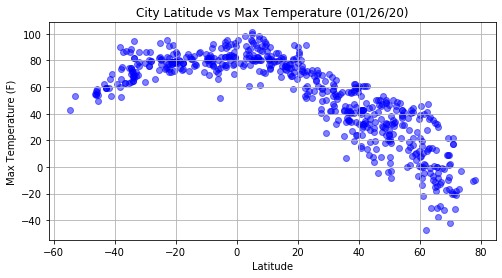

This graph demonstrates the correlation that as we move away from the equator the temperature drops


In [26]:
#Establish Current dat for title
today = time.strftime("%m/%d/%y")

# Plot the Latitude vs. Temp data with analysis 
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Max Temp"], color='b', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig('output_data/latitude_vs_temp.png')
plt.show()
print(f"This graph demonstrates the correlation that as we move away from the equator the temperature drops")

#### Latitude vs. Humidity Plot

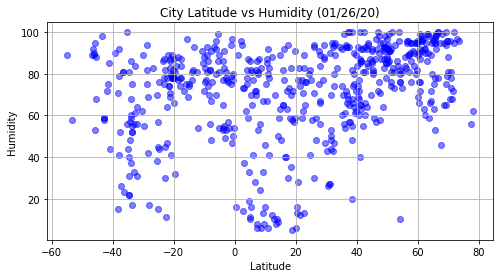

This graph shows that there is no significant correlation bewteen these two factors


In [27]:
#Plot the Latitude vs Humidity with analysis
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Humidity"], color='b', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Humidity")
plt.title(f"City Latitude vs Humidity ({today})")
plt.savefig('output_data/latitude_vs_humidity.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

#### Latitude vs. Cloudiness Plot

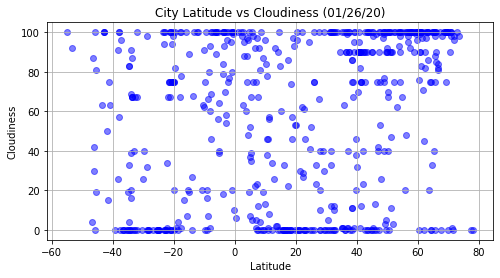

This graph shows that there is no significant correlation bewteen these two factors


In [28]:
#Plot the Latitude vs Cloudiness with analysis
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Cloudiness"], color='b', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.savefig('output_data/latitude_vs_cloudiness.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

#### Latitude vs. Wind Speed Plot

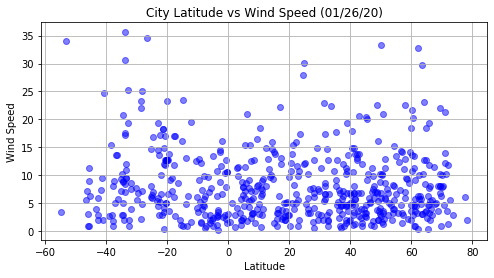

This graph shows that there is no significant correlation bewteen these two factors


In [29]:
#Plot the Latitude vs Wind Speed with analysis
plt.figure(figsize=(8,4))
plt.scatter(city_df["Lat"], city_df["Wind Speed"], color='b', alpha=0.5)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.savefig('output_data/latitude_vs_windspeed.png')
plt.show()
print(f"This graph shows that there is no significant correlation bewteen these two factors")

## Linear Regression

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df["Lat"] > 0,:]
southern_df = city_df.loc[city_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8884755053279828


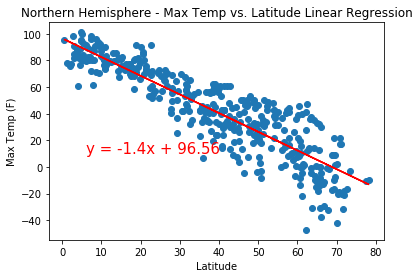

In [39]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_max_vs_temp_regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6061198332206611


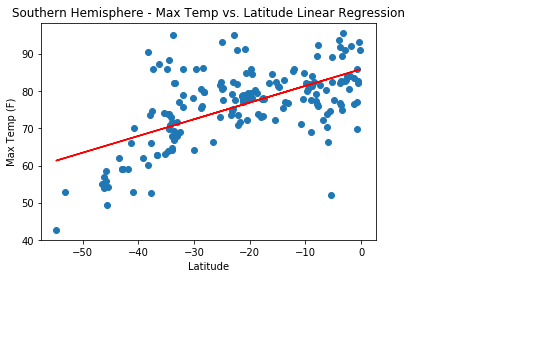

In [43]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Southern_max_vs_temp_regression.png')
plt.show()

In [61]:
print(f"The comparrison of the temperatures within the northern and sothern hemisphere's against latitude demonstrates that the temperature in creases as you approach the equator")

The comparrison of the temperatures within the northern and sothern hemisphere's against latitude demonstrates that the temperature in creases as you approach the equator


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4840701352832544


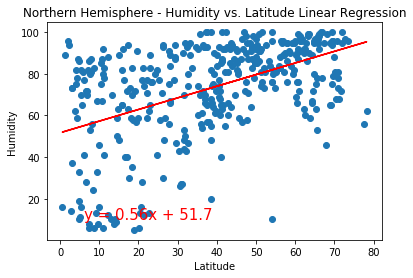

In [48]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_humidity_regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21286009266180292


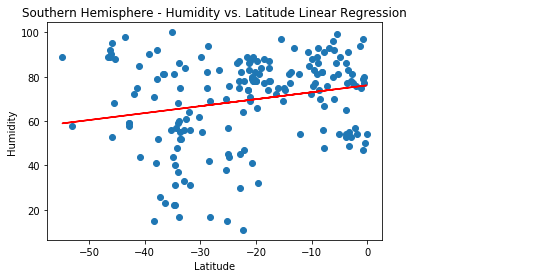

In [51]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Southern_humidity_regression.png')
plt.show()

In [62]:
print(f"There was not any notable relatoionship between humidity and latitude that can be identified")

There was not any notable relatoionship between humidity and latitude that can be identified


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3391428187454739


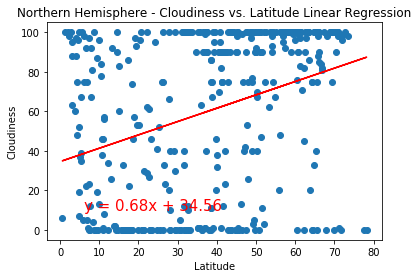

In [54]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_cloudiness_regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.243347563293399


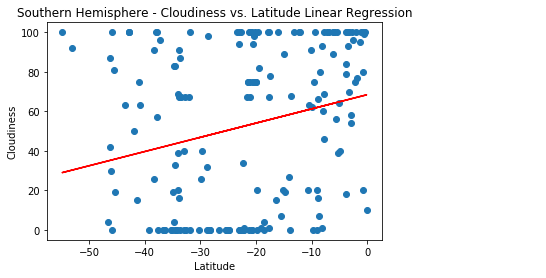

In [55]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Southern_cloudiness_regression.png')
plt.show()

In [63]:
print(f"There was not any notable relatoionship between Cloudiness and latitude that can be identified")

There was not any notable relatoionship between Cloudiness and latitude that can be identified


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0466973746414176


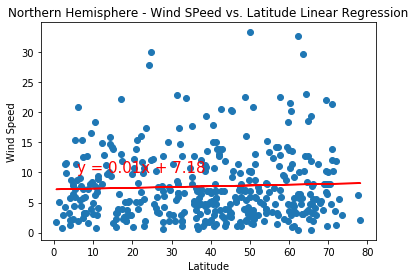

In [58]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed')
plt.title('Northern Hemisphere - Wind SPeed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/northern_windspeed_regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.16544393270767563


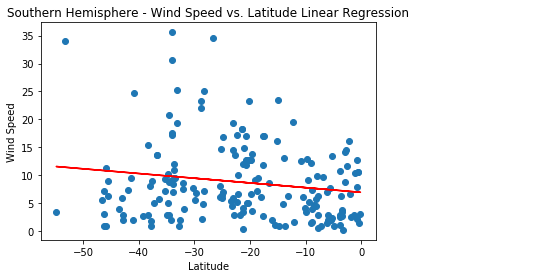

In [59]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/Southern_windspeed_regression.png')
plt.show()

In [64]:
print(f"There was not any notable relatoionship between Wind Speed and latitude that can be identified")

There was not any notable relatoionship between Wind Speed and latitude that can be identified
